In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import math
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm


In [2]:
# Load the data
df = pd.read_csv('/content/PJMW_hourly.csv')
df

,Datetime,PJMW_MW
0,2002-12-31 01:00:00,5077.0
1,2002-12-31 02:00:00,4939.0
2,2002-12-31 03:00:00,4885.0
3,2002-12-31 04:00:00,4857.0
4,2002-12-31 05:00:00,4930.0
...,...,...
143201,2018-01-01 20:00:00,8401.0
143202,2018-01-01 21:00:00,8373.0
143203,2018-01-01 22:00:00,8238.0
143204,2018-01-01 23:00:00,7958.0


In [3]:
# Set the desired fraction of the dataset to remove (e.g., 0.5 for 50%)
fraction_to_remove = 0.4

# Calculate the number of rows to remove
num_rows_to_remove = int(len(df) * fraction_to_remove)

# Remove the first 50% of the data
df_sampled = df[num_rows_to_remove:]

In [4]:
df = df_sampled.copy()

In [5]:

# Convert the 'Datetime' column to datetime format
df['Datetime'] = pd.to_datetime(df['Datetime'])

df


,Datetime,PJMW_MW
57282,2008-03-20 08:00:00,6188.0
57283,2008-03-20 09:00:00,6274.0
57284,2008-03-20 10:00:00,6198.0
57285,2008-03-20 11:00:00,6198.0
57286,2008-03-20 12:00:00,6148.0
...,...,...
143201,2018-01-01 20:00:00,8401.0
143202,2018-01-01 21:00:00,8373.0
143203,2018-01-01 22:00:00,8238.0
143204,2018-01-01 23:00:00,7958.0


In [7]:
# Extract the date component from the 'Datetime' column
df['Date'] = df['Datetime'].dt.date

# Print the updated DataFrame
print(df)

                  Datetime  PJMW_MW        Date
42961  2007-11-07 12:00:00   5940.0  2007-11-07
42962  2007-11-07 13:00:00   5928.0  2007-11-07
42963  2007-11-07 14:00:00   5841.0  2007-11-07
42964  2007-11-07 15:00:00   5788.0  2007-11-07
42965  2007-11-07 16:00:00   5821.0  2007-11-07
...                    ...      ...         ...
143201 2018-01-01 20:00:00   8401.0  2018-01-01
143202 2018-01-01 21:00:00   8373.0  2018-01-01
143203 2018-01-01 22:00:00   8238.0  2018-01-01
143204 2018-01-01 23:00:00   7958.0  2018-01-01
143205 2018-01-02 00:00:00   7691.0  2018-01-02

[100245 rows x 3 columns]


In [8]:
df = df.drop('Datetime', axis=1)
df

,PJMW_MW,Date
42961,5940.0,2007-11-07
42962,5928.0,2007-11-07
42963,5841.0,2007-11-07
42964,5788.0,2007-11-07
42965,5821.0,2007-11-07
...,...,...
143201,8401.0,2018-01-01
143202,8373.0,2018-01-01
143203,8238.0,2018-01-01
143204,7958.0,2018-01-01


In [10]:
df.set_index('Date', inplace = True)


In [6]:
df.set_index('Datetime', inplace = True)


In [7]:
df

,PJMW_MW
Datetime,
2008-03-20 08:00:00,6188.0
2008-03-20 09:00:00,6274.0
2008-03-20 10:00:00,6198.0
2008-03-20 11:00:00,6198.0
2008-03-20 12:00:00,6148.0
...,...
2018-01-01 20:00:00,8401.0
2018-01-01 21:00:00,8373.0
2018-01-01 22:00:00,8238.0


In [84]:
df.describe()

,PJMW_MW
count,71603.000000
mean,5573.763474
std,1004.493936
min,2553.000000
25%,4855.000000
50%,5461.000000
75%,6241.000000
max,9594.000000


<Axes: xlabel='Datetime'>

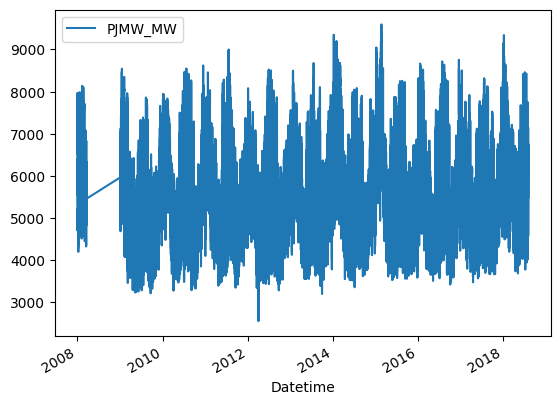

In [8]:
df.plot()

In [10]:
test_result=adfuller(df['PJMW_MW'])


In [22]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(PJMW_MW):
    result=adfuller(PJMW_MW)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [23]:
adfuller_test(df['PJMW_MW'])
#Data is stationary

ADF Test Statistic : -14.478827509868617
p-value : 6.422708168422416e-27
#Lags Used : 68
Number of Observations Used : 100176
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


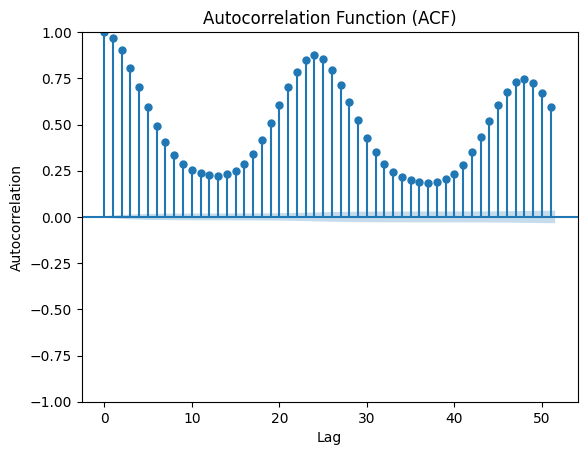

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


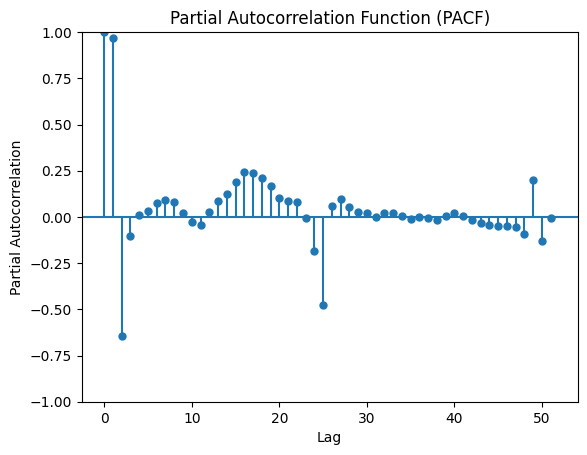

In [24]:
# Extract the target variable
target = df['PJMW_MW']

# Plot ACF
plot_acf(target)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot PACF
plot_pacf(target)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [99]:
df = df.groupby('Date').mean()

In [25]:
df

,PJMW_MW
Datetime,
2007-11-07 12:00:00,5940.0
2007-11-07 13:00:00,5928.0
2007-11-07 14:00:00,5841.0
2007-11-07 15:00:00,5788.0
2007-11-07 16:00:00,5821.0
...,...
2018-01-01 20:00:00,8401.0
2018-01-01 21:00:00,8373.0
2018-01-01 22:00:00,8238.0


<Axes: xlabel='Datetime'>

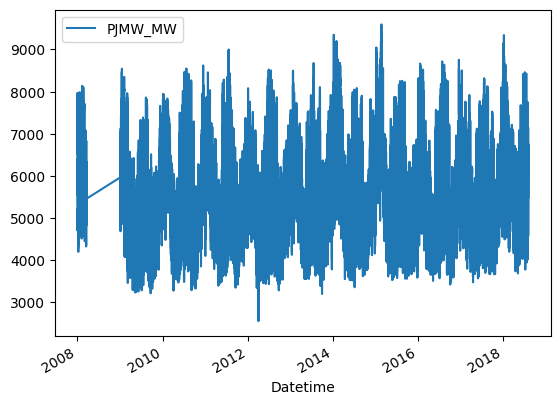

In [30]:
df.plot()

In [13]:
df

,PJMW_MW
Datetime,
2007-11-07 12:00:00,5940.0
2007-11-07 13:00:00,5928.0
2007-11-07 14:00:00,5841.0
2007-11-07 15:00:00,5788.0
2007-11-07 16:00:00,5821.0
...,...
2018-01-01 20:00:00,8401.0
2018-01-01 21:00:00,8373.0
2018-01-01 22:00:00,8238.0


In [9]:
model=sm.tsa.statespace.SARIMAX(df['PJMW_MW'],order=(1, 0, 1),seasonal_order=(1,0,1,24))
results=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [30]:
results

In [16]:
results.fittedvalues

Datetime
2010-08-01 06:00:00       0.000000
2010-08-01 07:00:00    3829.815678
2010-08-01 08:00:00    3826.791616
2010-08-01 09:00:00    4005.188573
2010-08-01 10:00:00    4412.415648
                          ...     
2018-01-01 20:00:00    8288.259233
2018-01-01 21:00:00    8310.623423
2018-01-01 22:00:00    8148.587940
2018-01-01 23:00:00    7930.183843
2018-01-02 00:00:00    7691.127682
Length: 71603, dtype: float64

In [17]:
results.resid

Datetime
2010-08-01 06:00:00    3900.000000
2010-08-01 07:00:00      76.184322
2010-08-01 08:00:00     234.208384
2010-08-01 09:00:00     443.811427
2010-08-01 10:00:00     482.584352
                          ...     
2018-01-01 20:00:00     112.740767
2018-01-01 21:00:00      62.376577
2018-01-01 22:00:00      89.412060
2018-01-01 23:00:00      27.816157
2018-01-02 00:00:00      -0.127682
Length: 71603, dtype: float64

In [10]:
# Add the predicted values to the DataFrame
df['predicted_values'] = results.fittedvalues

In [11]:
df

,PJMW_MW,predicted_values
Datetime,,
2008-03-20 08:00:00,6188.0,0.000000
2008-03-20 09:00:00,6274.0,6081.647993
2008-03-20 10:00:00,6198.0,6163.128425
2008-03-20 11:00:00,6198.0,6067.697121
2008-03-20 12:00:00,6148.0,6089.552963
...,...,...
2018-01-01 20:00:00,8401.0,8288.894586
2018-01-01 21:00:00,8373.0,8311.476814
2018-01-01 22:00:00,8238.0,8149.325017


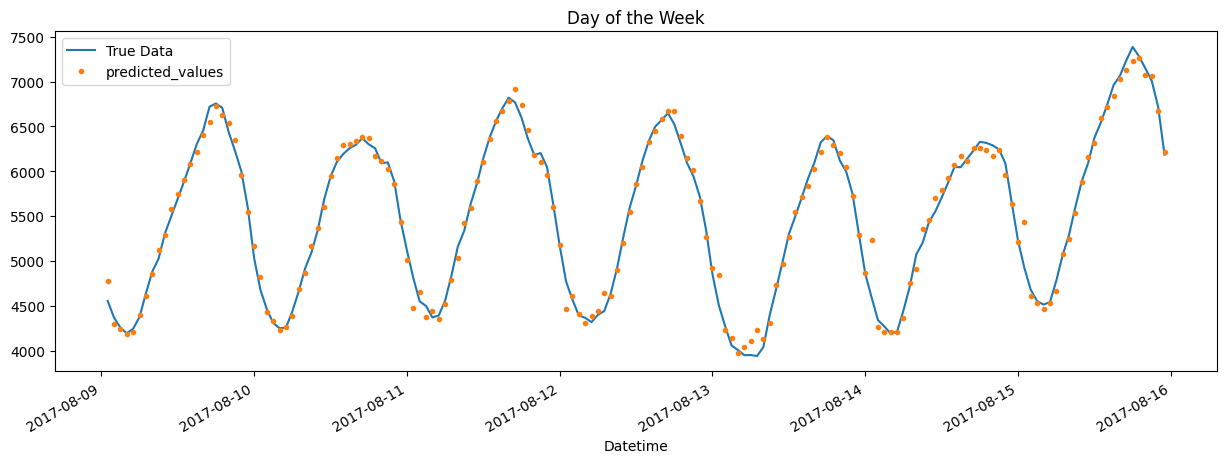

In [13]:
# Plot the actual data
ax = df.loc[(df.index > '08-09-2017') & (df.index < '08-16-2017')]['PJMW_MW'] \
    .plot(figsize=(15, 5), title='Day of the Week')

# Plot the predictions
df.loc[(df.index > '08-09-2017') & (df.index < '08-16-2017')]['predicted_values'] \
    .plot(style='.')

plt.legend(['True Data', 'predicted_values'])

plt.show()

In [7]:
import pandas as pd

# Define the start date for the future dataset
start_date = pd.to_datetime('2018-01-02 01:00:00')

# Create a DatetimeIndex for the next one year, starting from the defined start date
future_dates = pd.date_range(start=start_date, periods=8760, freq='H')

# Create an empty DataFrame for the future dataset
future_df = pd.DataFrame(index=future_dates)

# Concatenate the original DataFrame and the future DataFrame
extended_df = pd.concat([df, future_df])

# Print the extended DataFrame
print(extended_df)


                     PJMW_MW
2008-03-20 08:00:00   6188.0
2008-03-20 09:00:00   6274.0
2008-03-20 10:00:00   6198.0
2008-03-20 11:00:00   6198.0
2008-03-20 12:00:00   6148.0
...                      ...
2019-01-01 20:00:00      NaN
2019-01-01 21:00:00      NaN
2019-01-01 22:00:00      NaN
2019-01-01 23:00:00      NaN
2019-01-02 00:00:00      NaN

[94684 rows x 1 columns]


In [8]:
import pandas as pd
import statsmodels.api as sm

# Create the SARIMAX model
model = sm.tsa.statespace.SARIMAX(df['PJMW_MW'], order=(1, 0, 1), seasonal_order=(1, 0, 1, 24))

# Fit the model to the data
results = model.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [10]:

# Define the start date for the future dataset
start_date = pd.to_datetime('2018-01-02 01:00:00')

# Create a DatetimeIndex for the next one year, starting from the defined start date
future_dates = pd.date_range(start=start_date, periods=8760, freq='H')

# Generate predictions for the future data
forecast = results.get_forecast(steps=8760)

# Extract the predicted values and confidence intervals from the forecast
predicted_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Create a DataFrame for the future dataset
future_df = pd.DataFrame(index=future_dates)

# Add the predicted values and confidence intervals to the future DataFrame
future_df['predicted_values'] = predicted_values


# Concatenate the original DataFrame and the future DataFrame
extended_df = pd.concat([df, future_df])

# Print the extended DataFrame
print(extended_df)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


                     PJMW_MW  predicted_values
2008-03-20 08:00:00   6188.0               NaN
2008-03-20 09:00:00   6274.0               NaN
2008-03-20 10:00:00   6198.0               NaN
2008-03-20 11:00:00   6198.0               NaN
2008-03-20 12:00:00   6148.0               NaN
...                      ...               ...
2019-01-01 20:00:00      NaN               NaN
2019-01-01 21:00:00      NaN               NaN
2019-01-01 22:00:00      NaN               NaN
2019-01-01 23:00:00      NaN               NaN
2019-01-02 00:00:00      NaN               NaN

[94684 rows x 2 columns]


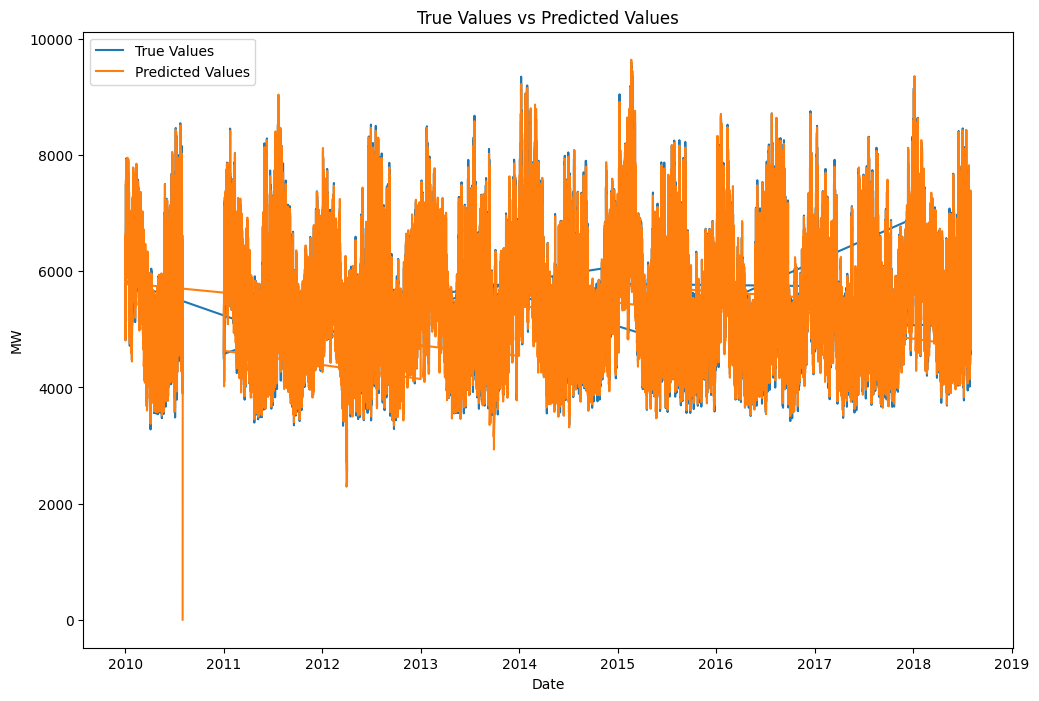

In [18]:
import matplotlib.pyplot as plt

# Extract the true values and predicted values
true_values = df['PJMW_MW']
predicted_values = results.fittedvalues

# Plot the true values and predicted values
plt.figure(figsize=(12, 8))
plt.plot(true_values.index, true_values, label='True Values')
plt.plot(predicted_values.index, predicted_values, label='Predicted Values')
plt.xlabel('Date')
plt.ylabel('MW')
plt.title('True Values vs Predicted Values')
plt.legend()
plt.show()


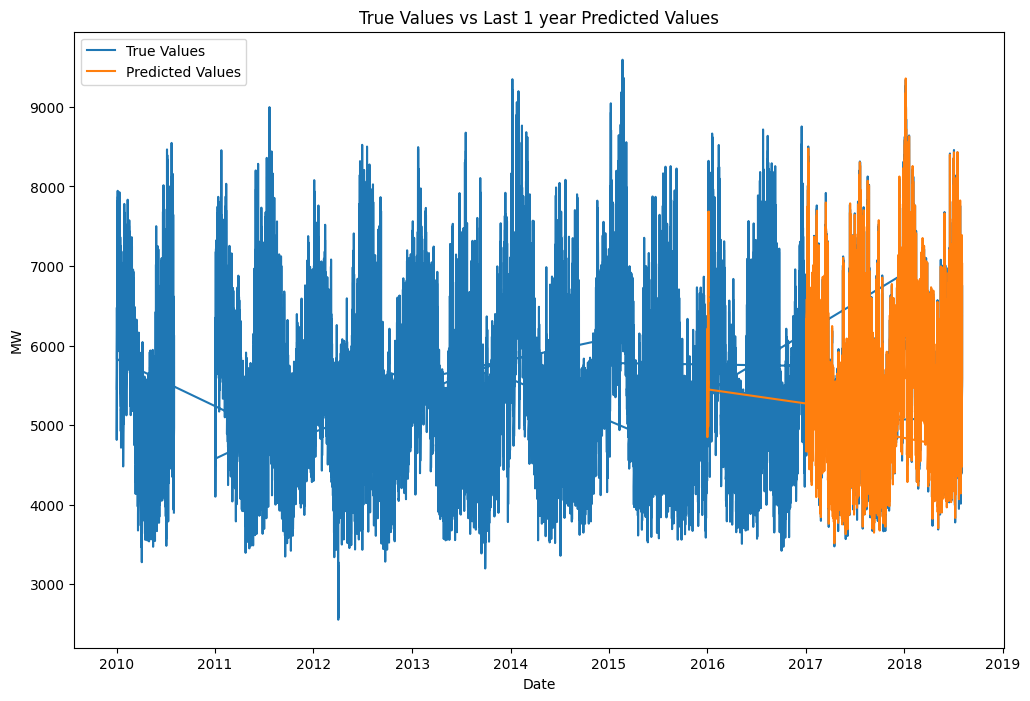

In [19]:
import matplotlib.pyplot as plt

# Extract the true values and predicted values
true_values = df['PJMW_MW']
predicted_values = results.fittedvalues[-14000:]

# Plot the true values and last 24 predicted values
plt.figure(figsize=(12, 8))
plt.plot(true_values.index, true_values, label='True Values')
plt.plot(predicted_values.index, predicted_values, label='Predicted Values')
plt.xlabel('Date')
plt.ylabel('MW')
plt.title('True Values vs Last 1 year Predicted Values')
plt.legend()
plt.show()


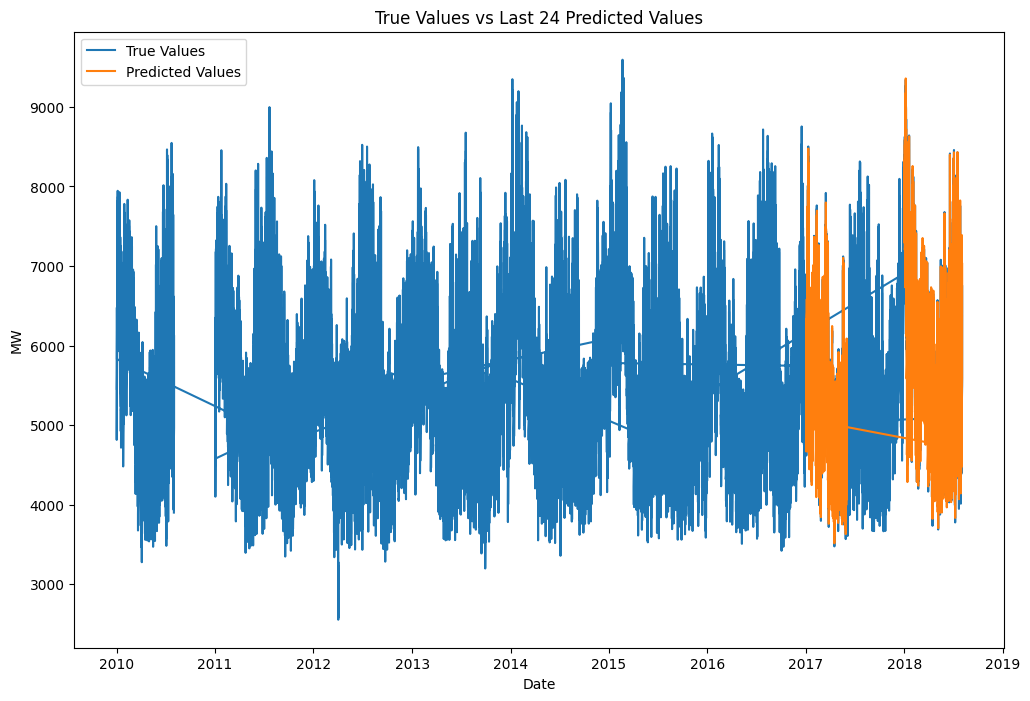

In [20]:
import matplotlib.pyplot as plt

# Extract the true values and predicted values
true_values = df['PJMW_MW']
predicted_values = results.fittedvalues[-8760:]

# Plot the true values and last 24 predicted values
plt.figure(figsize=(12, 8))
plt.plot(true_values.index, true_values, label='True Values')
plt.plot(predicted_values.index, predicted_values, label='Predicted Values')
plt.xlabel('Date')
plt.ylabel('MW')
plt.title('True Values vs Last 24 Predicted Values')
plt.legend()
plt.show()


In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Extract the true values and predicted values
true_values = df['PJMW_MW']
predicted_values = results.fittedvalues

# Calculate RMSE
rmse = mean_squared_error(true_values, predicted_values, squared=False)

# Calculate MAE
mae = mean_absolute_error(true_values, predicted_values)

print("RMSE:", rmse)
print("MAE:", mae)


RMSE: 149.11017772065222
MAE: 83.65122243665107


In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Extract the true values and predicted values
true_values = df['PJMW_MW']
predicted_values = results.fittedvalues

# Calculate RMSE
rmse = mean_squared_error(true_values, predicted_values, squared=False)

# Calculate MAE
mae = mean_absolute_error(true_values, predicted_values)

# Calculate R-squared
r2 = r2_score(true_values, predicted_values)

print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared:", r2)


RMSE: 149.11017772065222
MAE: 83.65122243665107
R-squared: 0.9779643430778227
